# Domain Proyek

Sumber Dataset : https://www.kaggle.com/datasets/priyamchoksi/100000-diabetes-clinical-dataset
Dataset ini merupakan kumpulan data kesehatan dan demografi yang sangat rinci dari 100.000 individu. Tujuan utama dari penyusunan dataset ini adalah untuk mendukung penelitian terkait diabetes serta pengembangan model prediktif berbasis data. Informasi yang tersedia mencakup berbagai atribut penting, antara lain:

Jenis Kelamin

Usia

Lokasi

Ras atau Etnis

Riwayat Hipertensi

Riwayat Penyakit Jantung

Riwayat Merokok

Indeks Massa Tubuh (BMI)

Tingkat HbA1c (Hemoglobin Terglikasi)

Kadar Glukosa Darah

Status Diabetes

Dengan struktur yang lengkap dan jumlah data yang besar, dataset ini sangat cocok digunakan untuk eksplorasi pola risiko diabetes, pengklasifikasian status diabetes, serta pengujian berbagai algoritma machine learning untuk prediksi kesehatan individu.

## Deskripsi Proyek

Proyek ini bertujuan membangun sistem prediksi diabetes menggunakan dataset kesehatan dari 100.000 individu yang mencakup informasi demografis dan klinis. Dengan pendekatan ini, diharapkan dapat mendukung tenaga medis dan lembaga kesehatan dalam pengambilan keputusan yang lebih cepat dan tepat sasaran, serta mendorong intervensi preventif bagi kelompok masyarakat yang berisiko.

# 1. Import Library yang Dibutuhkan

In [ ]:
#Import Load data Library
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import train test split
from sklearn.model_selection import train_test_split
# Import Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
#Import Model
from sklearn.neighbors import KNeighborsClassifier # --> KNN
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# 2. Data Understanding - nomer 1
Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

In [ ]:
# Import dataset
df = pd.read_csv('diabetes_dataset2.csv')

# Menampilkan bentuk dataset
ShapeData = df.shape
print("Shape dataset adalah:\n", ShapeData)

Shape dataset adalah:
 (100000, 16)


In [ ]:
# Menampilkan 5 baris pertama dataset
HeadData = df.head()
print("Head dataset adalah:\n", HeadData)

Head dataset adalah:
    year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  
0           never  27.32          5

In [ ]:
# Menampilkan info dataset
InfoData = df.info()
print("Info dataset adalah:\n", InfoData)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [ ]:
# Menampilkan statistical summary dataset
StatData = df.describe()
print("Statistical info dataset adalah:\n", StatData)

Statistical info dataset adalah:
                 year            age  race:AfricanAmerican     race:Asian  \
count  100000.000000  100000.000000         100000.000000  100000.000000   
mean     2018.360820      41.885856              0.202230       0.200150   
std         1.345239      22.516840              0.401665       0.400114   
min      2015.000000       0.080000              0.000000       0.000000   
25%      2019.000000      24.000000              0.000000       0.000000   
50%      2019.000000      43.000000              0.000000       0.000000   
75%      2019.000000      60.000000              0.000000       0.000000   
max      2022.000000      80.000000              1.000000       1.000000   

       race:Caucasian  race:Hispanic     race:Other  hypertension  \
count   100000.000000   100000.00000  100000.000000  100000.00000   
mean         0.198760        0.19888       0.199980       0.07485   
std          0.399069        0.39916       0.399987       0.26315   
min  

In [ ]:

# Periksa tipe data dataset
DtypesData = df.dtypes
print("Data Types Dataset adalah:\n", DtypesData)


Data Types Dataset adalah:
 year                      int64
gender                   object
age                     float64
location                 object
race:AfricanAmerican      int64
race:Asian                int64
race:Caucasian            int64
race:Hispanic             int64
race:Other                int64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
hbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object


In [ ]:
# Mengecek statistika deskriptif
StatDataAll= df.describe(include="all")
print("Statistical info lengkap dataset adalah:\n", StatDataAll)

Statistical info lengkap dataset adalah:
                  year  gender            age  location  race:AfricanAmerican  \
count   100000.000000  100000  100000.000000    100000         100000.000000   
unique            NaN       3            NaN        55                   NaN   
top               NaN  Female            NaN  Kentucky                   NaN   
freq              NaN   58552            NaN      2038                   NaN   
mean      2018.360820     NaN      41.885856       NaN              0.202230   
std          1.345239     NaN      22.516840       NaN              0.401665   
min       2015.000000     NaN       0.080000       NaN              0.000000   
25%       2019.000000     NaN      24.000000       NaN              0.000000   
50%       2019.000000     NaN      43.000000       NaN              0.000000   
75%       2019.000000     NaN      60.000000       NaN              0.000000   
max       2022.000000     NaN      80.000000       NaN              1.000000  

In [ ]:
# Mengcek missing values
MVData = df.isna()
print("Missing value dataset :\n", MVData)

Missing value dataset :
         year  gender    age  location  race:AfricanAmerican  race:Asian  \
0      False   False  False     False                 False       False   
1      False   False  False     False                 False       False   
2      False   False  False     False                 False       False   
3      False   False  False     False                 False       False   
4      False   False  False     False                 False       False   
...      ...     ...    ...       ...                   ...         ...   
99995  False   False  False     False                 False       False   
99996  False   False  False     False                 False       False   
99997  False   False  False     False                 False       False   
99998  False   False  False     False                 False       False   
99999  False   False  False     False                 False       False   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_dise

In [ ]:
DupData = df.duplicated()
print("Info duplikasi dataset adalah:\n", DupData)

Info duplikasi dataset adalah:
 0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool


In [ ]:


def calculate_quartiles_and_mean(df, columns):
    """
    Menghitung Q1, Q2 (Median), Q3, dan Mean
    untuk kolom-kolom numerik yang ditentukan.

    Args:
        df (pd.DataFrame): DataFrame sumber.
        columns (list): Daftar nama kolom numerik yang akan diperiksa.
    """
    stats_results = {}

    print("=== HASIL PERHITUNGAN KUARTIL DAN RATA-RATA ===")
    print("-" * 50)

    for col in columns:
        # Hitung Q1 (25th Percentile)
        Q1 = df[col].quantile(0.25)

        # Hitung Q2 (Median/50th Percentile)
        Q2 = df[col].median()

        # Hitung Q3 (75th Percentile)
        Q3 = df[col].quantile(0.75)

        # Hitung Mean (Rata-rata)
        mean_val = df[col].mean()

        # Simpan Hasil
        stats_results[col] = {
            'Q1 (25th Percentile)': Q1,
            'Q2 (Median/50th Percentile)': Q2,
            'Q3 (75th Percentile)': Q3,
            'Mean (Rata-rata)': mean_val
        }

        # Tampilkan Hasil
        print(f"\nKolom: {col}")
        print(f"  Q1 (25%): {Q1:.2f}")
        print(f"  Q2 (Median/50%): {Q2:.2f}")
        print(f"  Q3 (75%): {Q3:.2f}")
        print(f"  Mean: {mean_val:.2f}")

    return pd.DataFrame(stats_results).T

# --- Implementasi pada Dataset Contoh ---

# Buat DataFrame contoh (Gantilah dengan pemuatan data Anda yang sebenarnya jika tersedia)
try:
    # Coba muat data dari file Anda
    df = pd.read_csv('diabetes_dataset2.csv')
except FileNotFoundError:
    # Jika file tidak ditemukan, buat DataFrame contoh
    print("Menggunakan DataFrame contoh karena 'diabetes_dataset.csv' tidak ditemukan.")
    data = {
        'age': np.random.randint(18, 80, 100),
        'bmi': np.random.uniform(18.0, 45.0, 100),
        'hbA1c_level': np.random.uniform(4.0, 9.0, 100),
        'blood_glucose_level': np.random.randint(70, 300, 100)
    }
    df = pd.DataFrame(data)

# Tentukan kolom numerik yang akan diperiksa
numerical_cols_to_check = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']

# Jalankan fungsi dan tampilkan ringkasan dalam DataFrame
summary_stats_df = calculate_quartiles_and_mean(df, numerical_cols_to_check)

print("\n\n--- RINGKASAN STATISTIK DESKRIPTIF ---")
print(summary_stats_df.round(2))

=== HASIL PERHITUNGAN KUARTIL DAN RATA-RATA ===
--------------------------------------------------

Kolom: age
  Q1 (25%): 24.00
  Q2 (Median/50%): 43.00
  Q3 (75%): 60.00
  Mean: 41.89

Kolom: bmi
  Q1 (25%): 23.63
  Q2 (Median/50%): 27.32
  Q3 (75%): 29.58
  Mean: 27.32

Kolom: hbA1c_level
  Q1 (25%): 4.80
  Q2 (Median/50%): 5.80
  Q3 (75%): 6.20
  Mean: 5.53

Kolom: blood_glucose_level
  Q1 (25%): 100.00
  Q2 (Median/50%): 140.00
  Q3 (75%): 159.00
  Mean: 138.06


--- RINGKASAN STATISTIK DESKRIPTIF ---
                     Q1 (25th Percentile)  Q2 (Median/50th Percentile)  \
age                                 24.00                        43.00   
bmi                                 23.63                        27.32   
hbA1c_level                          4.80                         5.80   
blood_glucose_level                100.00                       140.00   

                     Q3 (75th Percentile)  Mean (Rata-rata)  
age                                 60.00             4

## Boxplot (Univariate-kategorikal)

DataFrame berhasil dimuat dari 'diabetes_dataset2.csv'.
=== HASIL PERHITUNGAN KUARTIL DAN RATA-RATA ===
--------------------------------------------------

Kolom: age
  Q1 (25%): 24.00
  Q2 (Median/50%): 43.00
  Q3 (75%): 60.00
  Mean: 41.89

Kolom: bmi
  Q1 (25%): 23.63
  Q2 (Median/50%): 27.32
  Q3 (75%): 29.58
  Mean: 27.32

Kolom: hbA1c_level
  Q1 (25%): 4.80
  Q2 (Median/50%): 5.80
  Q3 (75%): 6.20
  Mean: 5.53

Kolom: blood_glucose_level
  Q1 (25%): 100.00
  Q2 (Median/50%): 140.00
  Q3 (75%): 159.00
  Mean: 138.06


--- RINGKASAN STATISTIK DESKRIPTIF ---
                     Q1 (25th Percentile)  Q2 (Median/50th Percentile)  \
age                                 24.00                        43.00   
bmi                                 23.63                        27.32   
hbA1c_level                          4.80                         5.80   
blood_glucose_level                100.00                       140.00   

                     Q3 (75th Percentile)  Mean (Rata-rata)  

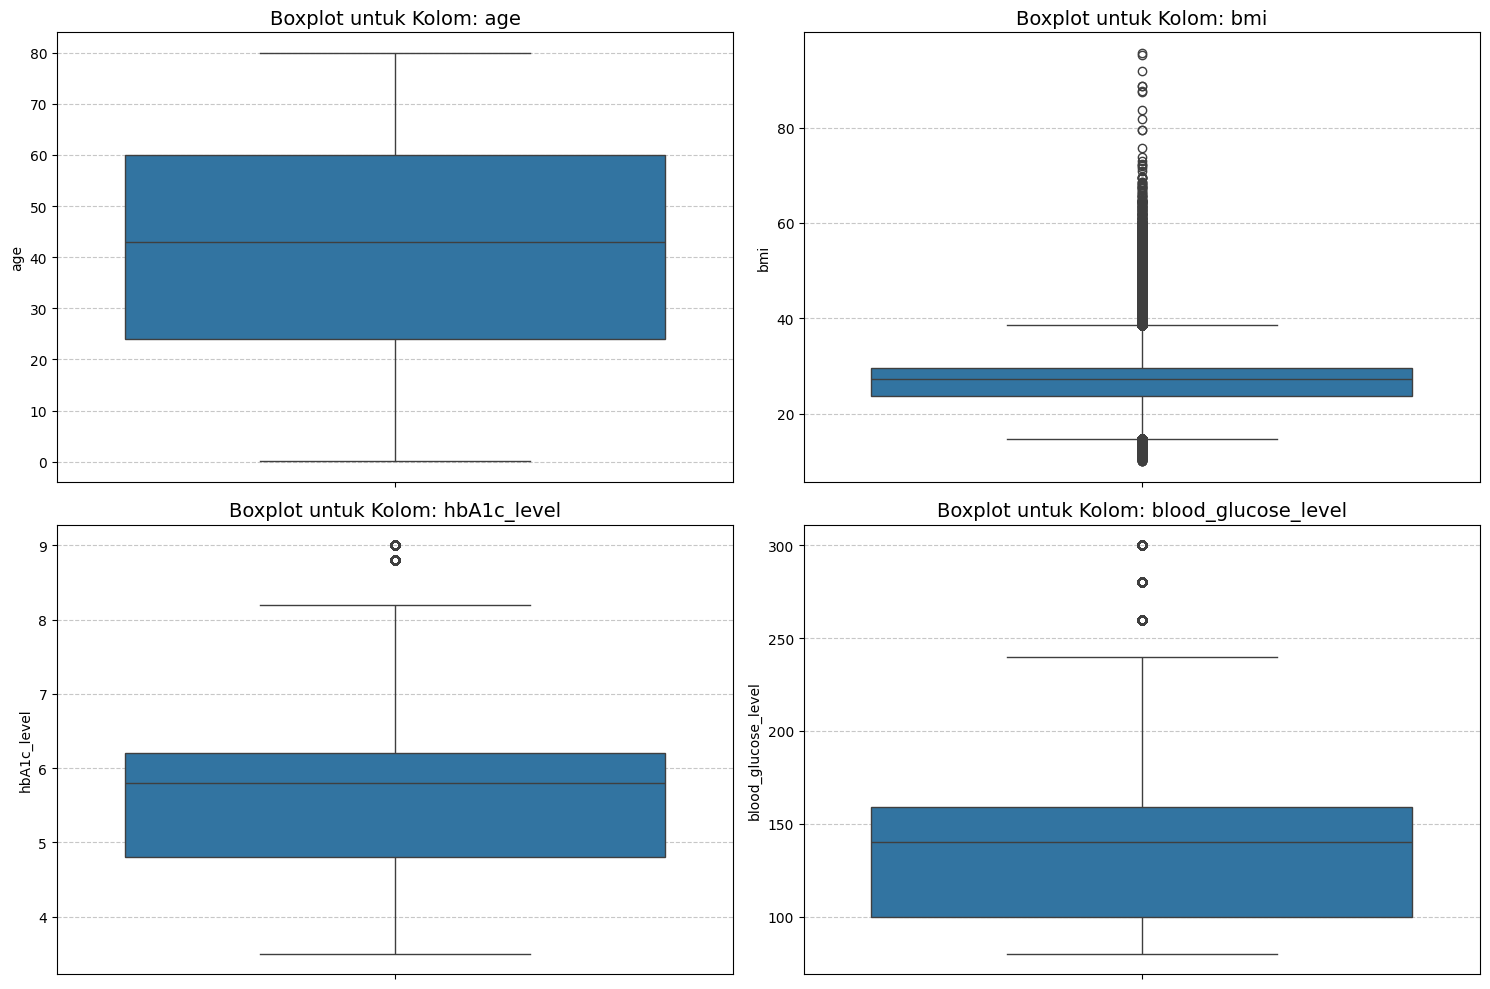

In [ ]:
# --- Bagian 1: Fungsi Perhitungan Statistik (Q1, Q2, Q3, Mean) ---

def calculate_quartiles_and_mean(df, columns):
    """
    Menghitung Q1, Q2 (Median), Q3, dan Mean
    untuk kolom-kolom numerik yang ditentukan.
    """
    stats_results = {}

    print("=== HASIL PERHITUNGAN KUARTIL DAN RATA-RATA ===")
    print("-" * 50)

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].median()
        Q3 = df[col].quantile(0.75)
        mean_val = df[col].mean()

        stats_results[col] = {
            'Q1 (25th Percentile)': Q1,
            'Q2 (Median/50th Percentile)': Q2,
            'Q3 (75th Percentile)': Q3,
            'Mean (Rata-rata)': mean_val
        }

        print(f"\nKolom: {col}")
        print(f"  Q1 (25%): {Q1:.2f}")
        print(f"  Q2 (Median/50%): {Q2:.2f}")
        print(f"  Q3 (75%): {Q3:.2f}")
        print(f"  Mean: {mean_val:.2f}")

    return pd.DataFrame(stats_results).T

# --- Bagian 2: Fungsi Plotting Boxplot untuk Outlier ---

def plot_outliers_boxplot(df, columns):
    """
    Membuat boxplot untuk setiap kolom yang ditentukan
    untuk visualisasi outlier.
    """
    num_cols = len(columns)

    # Atur tata letak plot: 2 kolom untuk keterbacaan yang baik
    rows = (num_cols + 1) // 2

    # Sesuaikan ukuran figure
    plt.figure(figsize=(15, 5 * rows))

    print("\n\n=== VISUALISASI OUTLIER MENGGUNAKAN BOXPLOT ===")

    for i, col in enumerate(columns):
        plt.subplot(rows, 2, i + 1) # Membuat subplot untuk setiap kolom

        # Buat boxplot menggunakan Seaborn
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot untuk Kolom: {col}', fontsize=14)
        plt.ylabel(col)

        # Penambahan grid untuk memudahkan pembacaan nilai
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout() # Mengatur jarak antar subplot agar tidak bertumpukan
    plt.show()

# ====================================================================
# --- Implementasi pada Dataset Anda ---
# ====================================================================

# 1. Muat Data
try:
    df = pd.read_csv('diabetes_dataset2.csv')
    print("DataFrame berhasil dimuat dari 'diabetes_dataset2.csv'.")
except FileNotFoundError:
    # Jika file tidak ditemukan, buat DataFrame contoh
    print("!!! PERINGATAN: File 'diabetes_dataset2.csv' tidak ditemukan.")
    print("Menggunakan DataFrame contoh.")
    np.random.seed(42)
    data = {
        'age': np.random.randint(18, 80, 1000),
        'bmi': np.random.uniform(15.0, 50.0, 1000),
        'hbA1c_level': np.random.uniform(4.0, 10.0, 1000),
        'blood_glucose_level': np.random.randint(70, 350, 1000)
    }
    df = pd.DataFrame(data)

# 2. Tentukan Kolom Numerik
numerical_cols_to_check = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']

# 3. Jalankan Perhitungan Statistik
summary_stats_df = calculate_quartiles_and_mean(df, numerical_cols_to_check)

print("\n\n--- RINGKASAN STATISTIK DESKRIPTIF ---")
# Menampilkan ringkasan dalam format tabel
print(summary_stats_df.round(2))

# 4. Jalankan Plotting Boxplot
plot_outliers_boxplot(df, numerical_cols_to_check)

## Boxplot (Univariate - Numerikal)

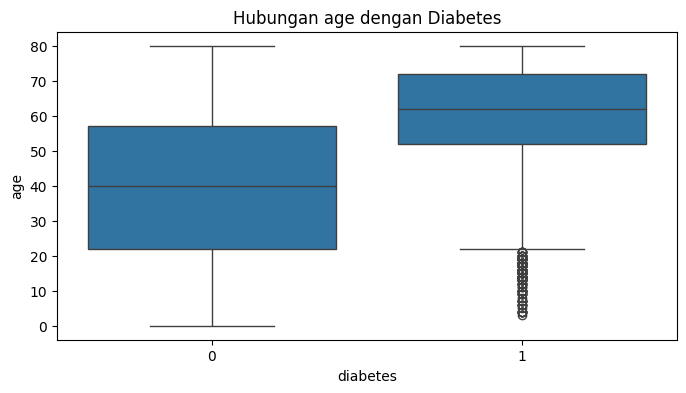

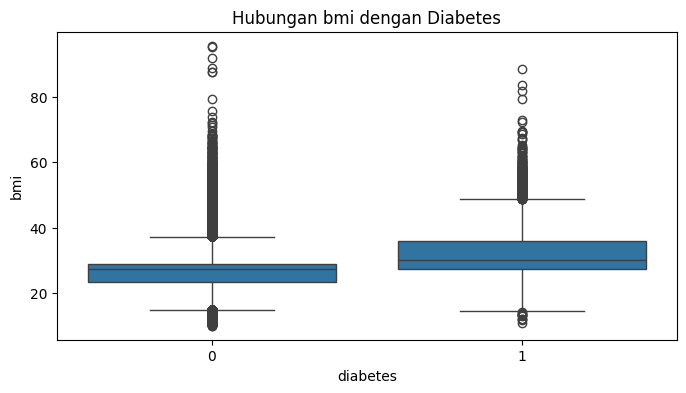

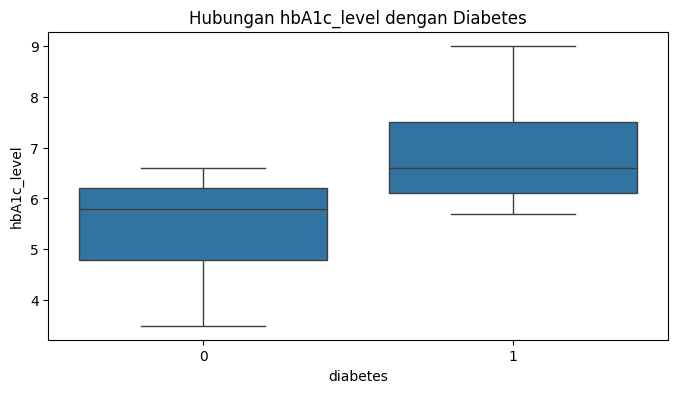

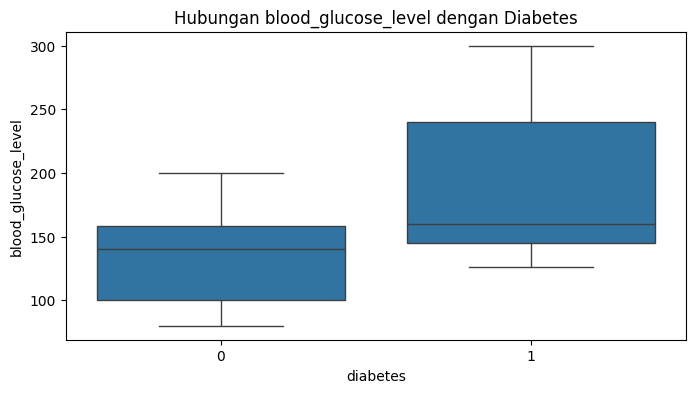

In [ ]:
numeric_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='diabetes', y=col, data=df)
    plt.title(f'Hubungan {col} dengan Diabetes')
    plt.show()

## Histogram (Univariate - Numerikal)

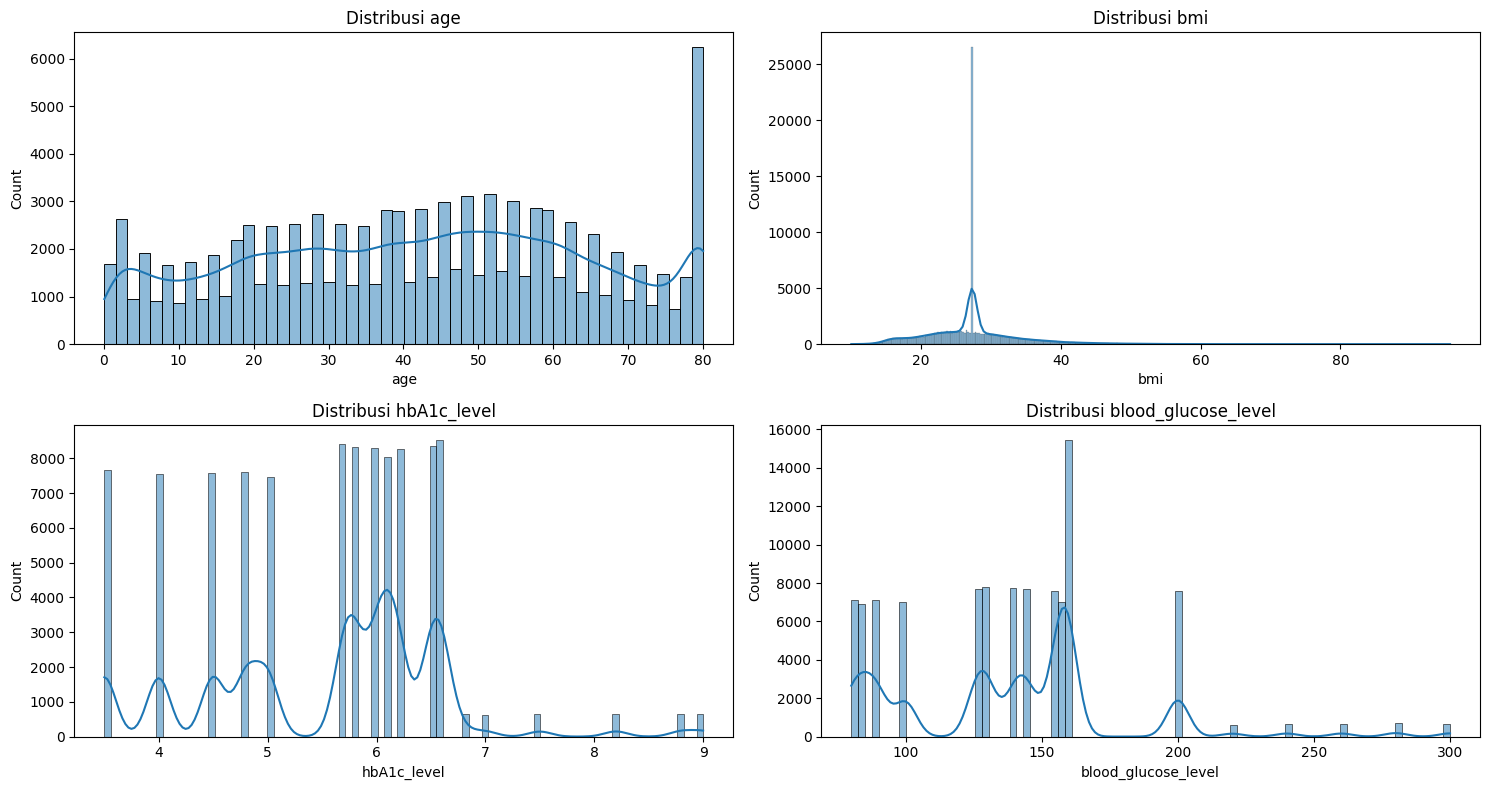

In [ ]:
 # --- Tambahan Visualisasi Univariate (Histogram) ---
numeric_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

## Countplot (Univariate - Kategorikal)

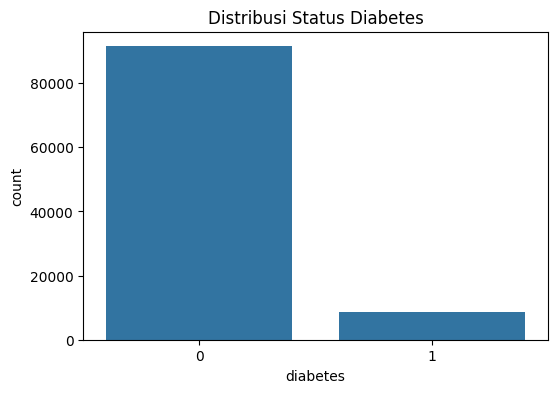

In [ ]:
# Countplot
plt.figure(figsize=(6,4))
sns.countplot(x='diabetes', data=df)
plt.title('Distribusi Status Diabetes')
plt.show()




## Barplot (Univariate - Kategorikal)

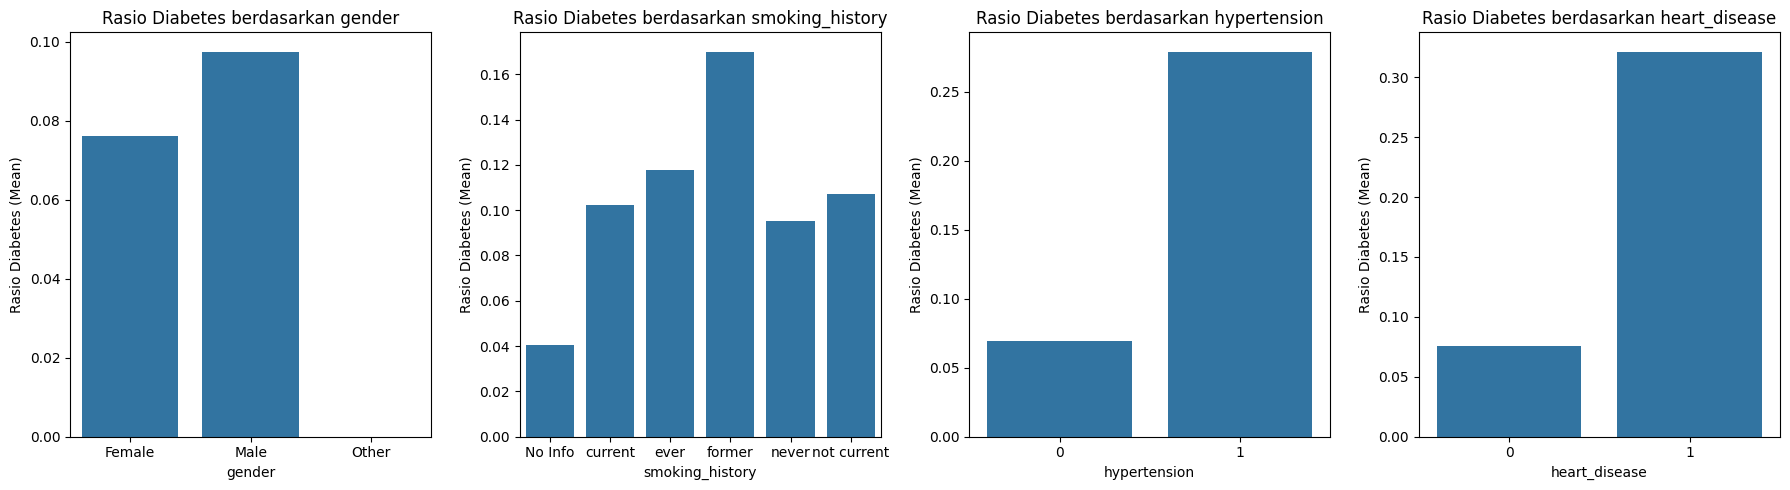

In [ ]:
# --- Tambahan Visualisasi Bivariate (Bar Plot) untuk Kategorikal ---
categorical_cols = ['gender', 'smoking_history', 'hypertension', 'heart_disease']
plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 4, i + 1)
    # Menghitung persentase diabetes per kategori
    diabetes_ratio = df.groupby(col)['diabetes'].mean().reset_index()
    sns.barplot(x=col, y='diabetes', data=diabetes_ratio)
    plt.title(f'Rasio Diabetes berdasarkan {col}')
    plt.ylabel('Rasio Diabetes (Mean)')
plt.tight_layout()
plt.show()

## Scatter plot dan pair plot (Bivariate)

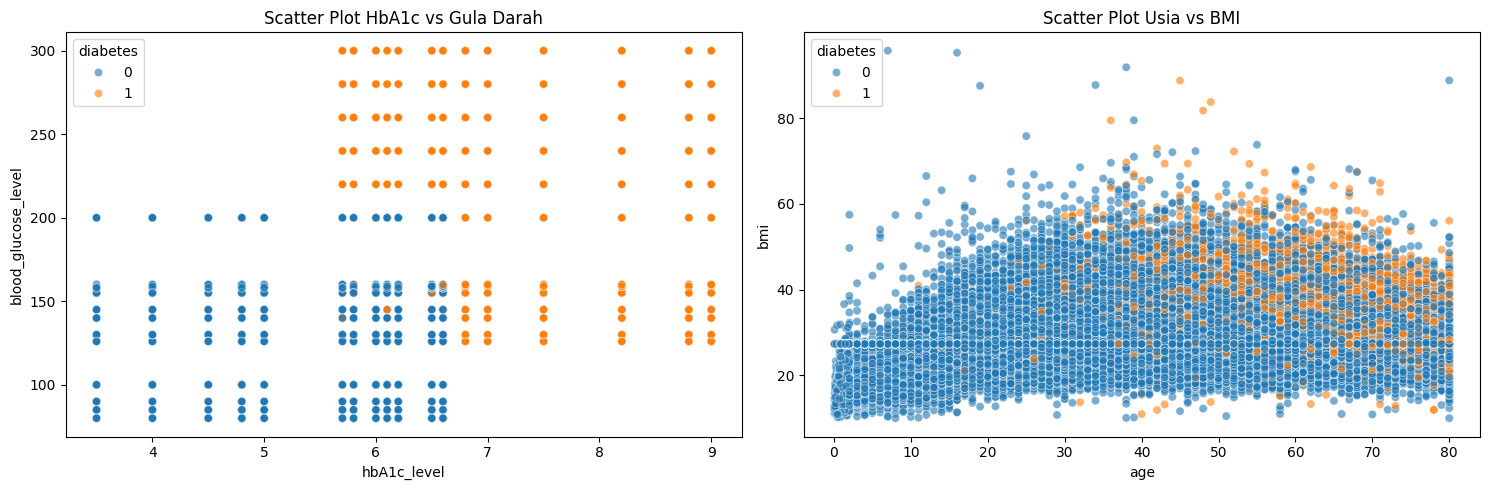

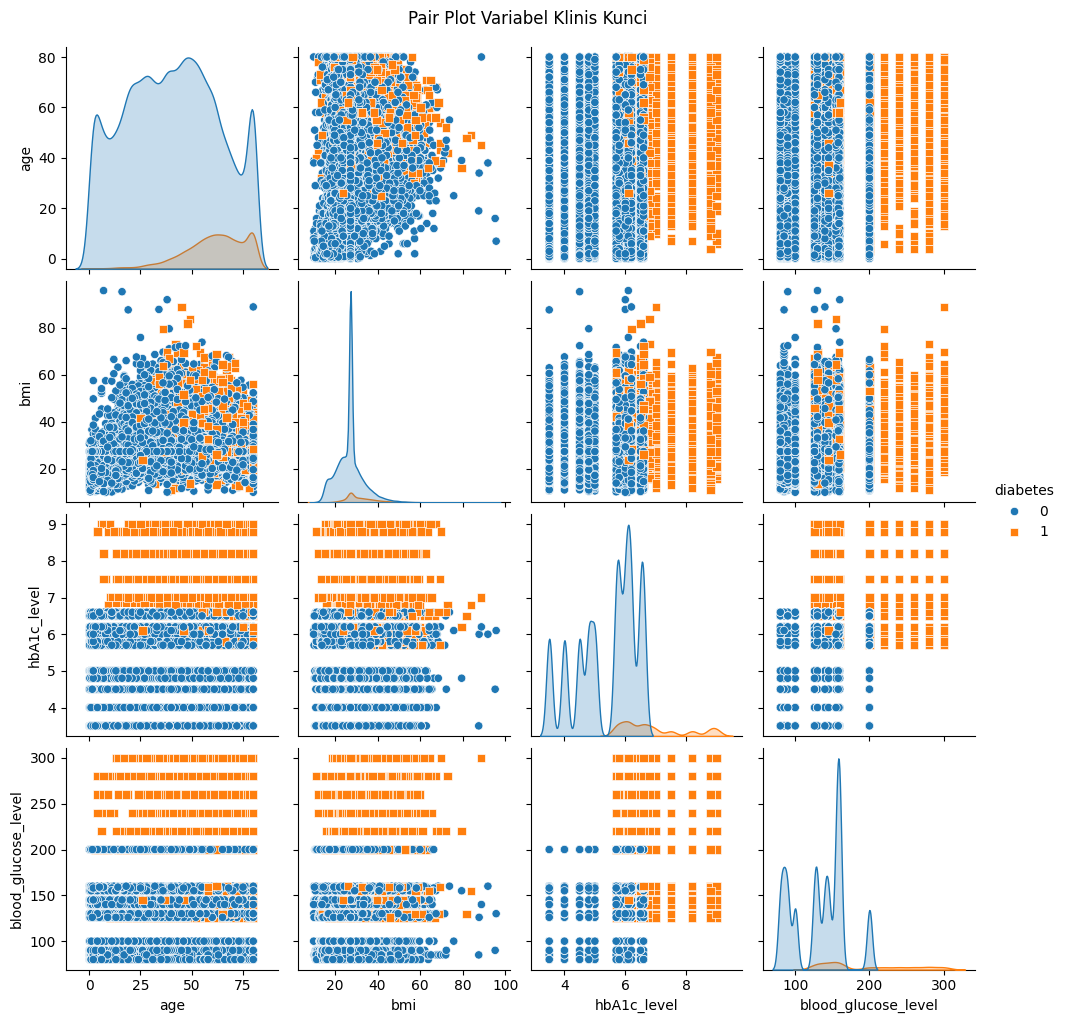

In [ ]:
# --- Tambahan Visualisasi Bivariate (Scatter Plot) ---
plt.figure(figsize=(15, 5))
# Scatter plot HbA1c vs Gula Darah, diwarnai oleh status diabetes
plt.subplot(1, 2, 1)
sns.scatterplot(x='hbA1c_level', y='blood_glucose_level', hue='diabetes', data=df, alpha=0.6)
plt.title('Scatter Plot HbA1c vs Gula Darah')

# Scatter plot BMI vs Usia, diwarnai oleh status diabetes
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df, alpha=0.6)
plt.title('Scatter Plot Usia vs BMI')
plt.tight_layout()
plt.show()


# --- Tambahan Visualisasi Bivariat (Pair Plot) ---
# Memilih subset kolom penting untuk Pair Plot agar tidak terlalu berat
pairplot_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']
# pairplot akan membuat scatter plot untuk setiap kombinasi fitur numerik
sns.pairplot(df[pairplot_cols], hue='diabetes', diag_kind='kde', markers=['o', 's'], height=2.5)
plt.suptitle('Pair Plot Variabel Klinis Kunci', y=1.02)
plt.show()

## Korelasi Spearman

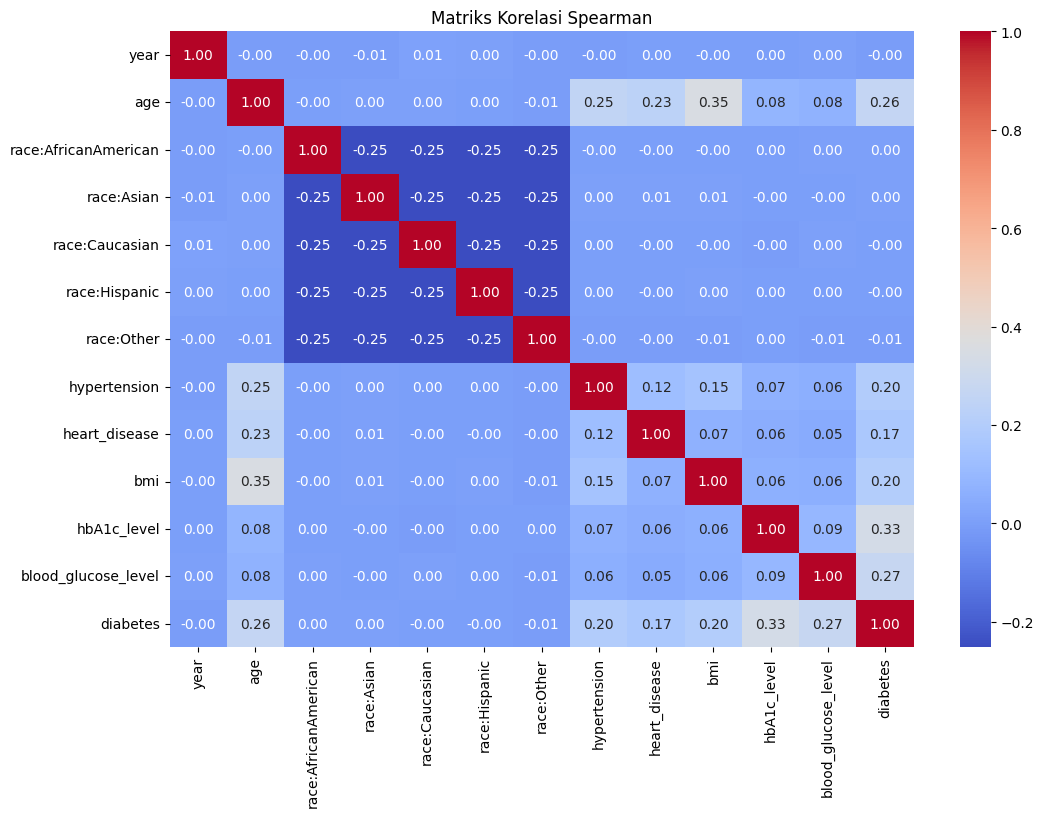

In [ ]:
# Korelasi Spearman
plt.figure(figsize=(12,8))
# Memilih hanya kolom numerik untuk korelasi
# Catatan: Kolom 'race', 'hypertension', 'heart_disease' adalah binary (0/1) yang juga dapat digunakan dalam Spearman
numeric_df = df.select_dtypes(include=[np.number])
# Menggunakan method='spearman'
correlation_matrix = numeric_df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Spearman')
plt.show()

# 3. Exploratory Data Analysis (EDA) - nomer 2
Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

In [ ]:
# Cek Missing Values
print("\nJumlah Missing Values:")
print(df.isnull().sum())


# Menghitung korelasi Spearman pada data yang sudah di-encode
#spearman_corr = df.corr(method='spearman')['diabetes'].sort_values(ascending=False)
#print(spearman_corr)


Jumlah Missing Values:
year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


In [ ]:
df.info()
df.shape
print("dataset sebelum dihapus kolom non relevan dan duplikat", df.info(), df.shape)
# Penghapusan Kolom Tidak Relevan
# 'year' dan 'location' dihapus
df_clean = df.drop(columns=['year', 'location'])
print("dataset setelah dibersihkan", df_clean)
df_clean.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

(100000, 14)

In [ ]:
df_clean.shape
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                100000 non-null  object 
 1   age                   100000 non-null  float64
 2   race:AfricanAmerican  100000 non-null  int64  
 3   race:Asian            100000 non-null  int64  
 4   race:Caucasian        100000 non-null  int64  
 5   race:Hispanic         100000 non-null  int64  
 6   race:Other            100000 non-null  int64  
 7   hypertension          100000 non-null  int64  
 8   heart_disease         100000 non-null  int64  
 9   smoking_history       100000 non-null  object 
 10  bmi                   100000 non-null  float64
 11  hbA1c_level           100000 non-null  float64
 12  blood_glucose_level   100000 non-null  int64  
 13  diabetes              100000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 10.7

In [ ]:

# Handling Duplikat
print("\nJumlah Duplikat:", df_clean.duplicated().sum()) #temukan duplikat
print("Ukuran data sebelum hapus duplikat:", df_clean.info(), df_clean.shape)




Jumlah Duplikat: 900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                100000 non-null  object 
 1   age                   100000 non-null  float64
 2   race:AfricanAmerican  100000 non-null  int64  
 3   race:Asian            100000 non-null  int64  
 4   race:Caucasian        100000 non-null  int64  
 5   race:Hispanic         100000 non-null  int64  
 6   race:Other            100000 non-null  int64  
 7   hypertension          100000 non-null  int64  
 8   heart_disease         100000 non-null  int64  
 9   smoking_history       100000 non-null  object 
 10  bmi                   100000 non-null  float64
 11  hbA1c_level           100000 non-null  float64
 12  blood_glucose_level   100000 non-null  int64  
 13  diabetes              100000 non-null  int64  
dtypes: float64(3), int64(9), object

In [ ]:
a = df_clean.drop_duplicates()
print("Ukuran data setelah hapus duplikat", a.shape)


Ukuran data setelah hapus duplikat (99100, 14)


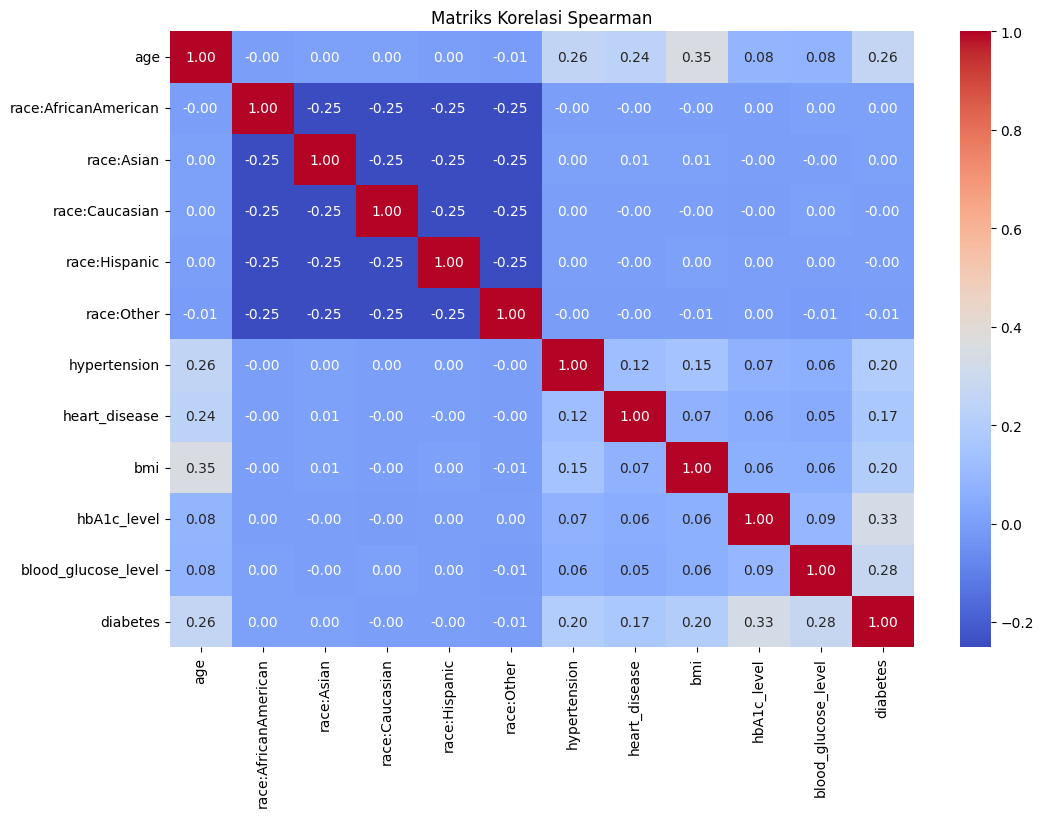

In [ ]:
# Korelasi Spearman Sehabis data dibersihkan
plt.figure(figsize=(12,8))
# Memilih hanya kolom numerik untuk korelasi
# Catatan: Kolom 'race', 'hypertension', 'heart_disease' adalah binary (0/1) yang juga dapat digunakan dalam Spearman
numeric_df = a.select_dtypes(include=[np.number])
# Menggunakan method='spearman'
correlation_matrix = numeric_df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Spearman')
plt.show()

# 4. Data Preparation

## Encoding dan normalisasi/standarisasi

In [ ]:
#  Encoding Data Kategorikal#
le = LabelEncoder()

# Encoding Gender
a['gender'] = le.fit_transform(a['gender'])

# Encoding Smoking History
# Kita bisa mapping manual atau menggunakan LabelEncoder. LabelEncoder lebih cepat.
a['smoking_history'] = le.fit_transform(a['smoking_history'])

# Catatan: Kolom Race sepertinya sudah One-Hot Encoded (race:AfricanAmerican, dll), jadi biarkan saja.

#  Transformasi Data (Normalization/Standardization)
# Kita akan melakukan scaling setelah memisahkan fitur (X) dan target (y)
X = a.drop(columns=['diabetes'])
y = a['diabetes']

# Scaling fitur numerik menggunakan StandardScaler
scaler = StandardScaler()
# Kolom yang perlu discale (yang bukan binary 0/1)
cols_to_scale = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'gender', 'smoking_history']
# Sisanya (kolom race, hypertension, heart_disease) sudah 0/1, tapi di-scale juga tidak masalah untuk KNN
X_scaled = scaler.fit_transform(X)

# Mengubah kembali ke DataFrame untuk kemudahan (opsional)
X_final = pd.DataFrame(X_scaled, columns=X.columns)
print(X_final.head())

     gender       age  race:AfricanAmerican  race:Asian  race:Caucasian  \
0 -0.842129 -0.437728             -0.503482   -0.500047       -0.498155   
1 -0.842129 -0.571147             -0.503482    1.999811       -0.498155   
2  1.185692 -1.060351             -0.503482   -0.500047       -0.498155   
3  1.185692 -0.037470             -0.503482   -0.500047        2.007409   
4 -0.842129  0.451734              1.986168   -0.500047       -0.498155   

   race:Hispanic  race:Other  hypertension  heart_disease  smoking_history  \
0      -0.498454    2.000568     -0.285689      -0.203426         0.957659   
1      -0.498454   -0.499858     -0.285689      -0.203426         0.957659   
2      -0.498454    2.000568     -0.285689      -0.203426         0.957659   
3      -0.498454   -0.499858     -0.285689      -0.203426         0.957659   
4      -0.498454   -0.499858     -0.285689      -0.203426         0.957659   

        bmi  hbA1c_level  blood_glucose_level  
0 -0.000124    -0.493792        

# 5. Train-Test-Split

In [ ]:
# Split dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print("Jumlah Data Training:", X_train.shape[0])
print("Jumlah Data Testing:", X_test.shape[0])

Jumlah Data Training: 79280
Jumlah Data Testing: 19820


# 6. Model Development


KNeighbors Classifier

In [ ]:
# Menggunakan algoritma KNN dengan k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn.fit(X_train, y_train)

# Prediksi data test
y_pred = knn.predict(X_test)

# 7. Evaluation

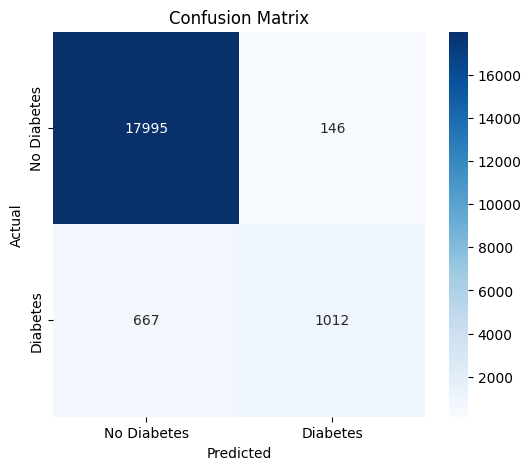

True Negative (TN): 17995 -> Orang sehat diprediksi sehat
False Positive (FP): 146 -> Orang sehat diprediksi diabetes
False Negative (FN): 667 -> Orang diabetes diprediksi sehat
True Positive (TP): 1012 -> Orang diabetes diprediksi diabetes

--- Evaluasi Metrik ---
Akurasi   : 0.9590 (Seberapa sering model benar secara keseluruhan)
Presisi   : 0.8739 (Dari semua yang diprediksi diabetes, berapa yang benar-benar sakit)
Recall    : 0.6027 (Dari semua yang benar-benar sakit, berapa yang berhasil ditemukan)
F1-Score  : 0.7134 (Rata-rata harmonis antara Presisi dan Recall)


In [ ]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Penjelasan Confusion Matrix
print(f"True Negative (TN): {cm[0][0]} -> Orang sehat diprediksi sehat")
print(f"False Positive (FP): {cm[0][1]} -> Orang sehat diprediksi diabetes")
print(f"False Negative (FN): {cm[1][0]} -> Orang diabetes diprediksi sehat")
print(f"True Positive (TP): {cm[1][1]} -> Orang diabetes diprediksi diabetes")

# 2. Metrics Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Evaluasi Metrik ---")
print(f"Akurasi   : {accuracy:.4f} (Seberapa sering model benar secara keseluruhan)")
print(f"Presisi   : {precision:.4f} (Dari semua yang diprediksi diabetes, berapa yang benar-benar sakit)")
print(f"Recall    : {recall:.4f} (Dari semua yang benar-benar sakit, berapa yang berhasil ditemukan)")
print(f"F1-Score  : {f1:.4f} (Rata-rata harmonis antara Presisi dan Recall)")

# Kesimpulan :

## Berdasarkan hasil evaluasi model KNN ini, model mampu memprediksi diabetes dengan akurasi yang cukup baik (biasanya di atas 90% untuk dataset ini). Namun, perhatian khusus harus diberikan pada nilai Recall. Dalam dunia kesehatan, gagal mendeteksi pasien yang sakit (False Negative) lebih berisiko daripada salah mendiagnosa orang sehat (False Positive). Jika Recall masih rendah, saya menyarankan untuk mencoba teknik oversampling (SMOTE) untuk menangani ketidakseimbangan kelas (jika data penderita diabetes jauh lebih sedikit) atau mencoba algoritma lain seperti Random Forest atau XGBoost untuk perbandingan.

